In [20]:
!pip install yfinance

In [21]:
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [22]:
# Definimos el rango de los datos
start = '2017-12-30'
end = '2024-02-29'

In [23]:
# Definimos los tickers de los assets

assets = ['TTWO', 'BABA', 'PYPL', 'INTC', 'META', 'MSFT', 'BRK-B', 'AMZN', 'NVDA', 'AMD', 'VOO', 'NU']
assets.sort()

In [24]:
print(assets)

['AMD', 'AMZN', 'BABA', 'BRK-B', 'INTC', 'META', 'MSFT', 'NU', 'NVDA', 'PYPL', 'TTWO', 'VOO']


In [25]:
# Descargamos los datos
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  12 of 12 completed


In [26]:
print(data)

                   AMD        AMZN        BABA       BRK-B       INTC  \
Date                                                                    
2018-01-02   10.980000   59.450500  181.213989  197.220001  39.740643   
2018-01-03   11.550000   60.209999  181.559357  199.789993  38.391918   
2018-01-04   12.120000   60.479500  183.246689  200.690002  37.687866   
2018-01-05   11.880000   61.457001  188.170486  201.419998  37.950832   
2018-01-08   12.280000   62.343498  187.805389  202.740005  37.950832   
...                ...         ...         ...         ...        ...   
2024-02-22  181.860001  174.580002   76.120003  415.160004  42.980000   
2024-02-23  176.520004  174.990005   75.959999  417.220001  42.990002   
2024-02-26  176.009995  174.729996   76.510002  409.140015  42.990002   
2024-02-27  178.000000  173.539993   77.680000  408.910004  42.730000   
2024-02-28  176.539993  173.160004   74.589996  412.140015  41.990002   

                  META        MSFT     NU        N

In [27]:
# Calculando los retornos

Y = data.resample('M').last().pct_change().dropna()

display(Y.head())

,AMD,AMZN,BABA,BRK-B,INTC,META,MSFT,NU,NVDA,PYPL,TTWO,VOO
Date,,,,,,,,,,,,
2022-01-31,-0.206046,-0.102830,0.058928,0.046890,-0.052039,-0.068649,-0.075345,-0.208955,-0.167454,-0.088238,-0.080914,-0.052409
2022-02-28,0.079562,0.026673,-0.163765,0.026931,-0.015499,-0.326342,-0.037212,0.030997,-0.004125,-0.349017,-0.008204,-0.029805
2022-03-31,-0.113507,0.061437,0.034319,0.097869,0.038994,0.053689,0.031862,0.009150,0.119157,0.033235,-0.050988,0.037892
2022-04-30,-0.217853,-0.237525,-0.107629,-0.085234,-0.120460,-0.098444,-0.099867,-0.221503,-0.320274,-0.239689,-0.222649,-0.087844
2022-05-31,0.191066,-0.032764,-0.010712,-0.021219,0.027096,-0.034070,-0.018077,-0.366057,0.006740,-0.030934,0.042005,0.002588


In [28]:
!pip install riskfolio-lib

In [29]:
import riskfolio as rp

In [30]:
# Construyendo el objeto portafolio
port = rp.Portfolio(returns=Y)

In [31]:
# Calculando el portafolio optimo

# Definiendo los parametros de seleccion del metodo de optimizacion:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

In [32]:
# Estimando el portafolio optimo:

port.alpha = 0.05
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AMD,AMZN,BABA,BRK-B,INTC,META,MSFT,NU,NVDA,PYPL,TTWO,VOO
weights,7.890459e-10,7.467116e-10,1.111769e-09,0.497521,7.657098e-10,0.027761,2.462962e-09,5.202993e-09,0.474718,2.821196e-10,7.730362e-10,1.511915e-09


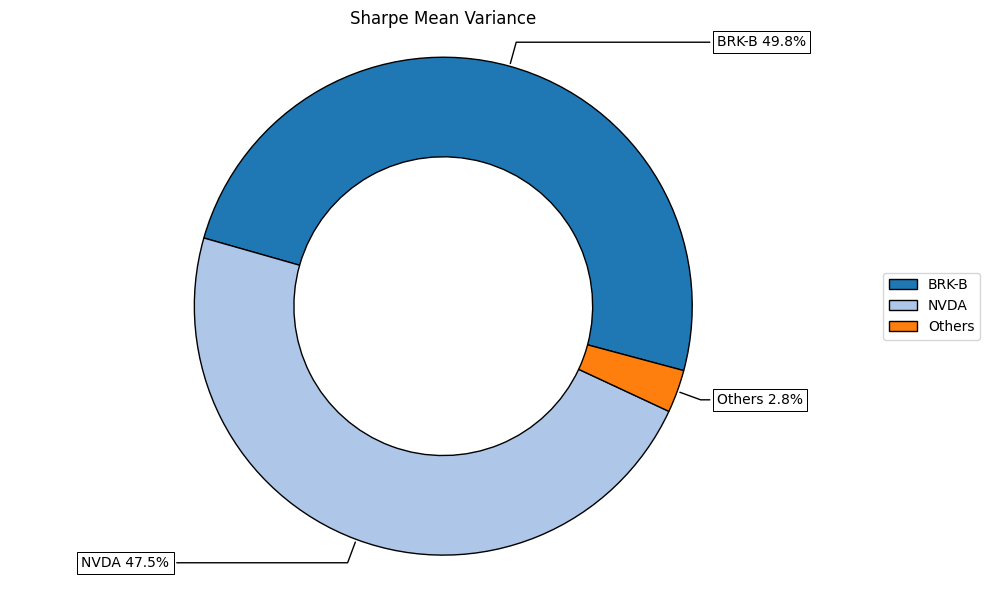

In [33]:
# Graficando la composicion del portafolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


## Siguiendo la Optimización por Maximización del Sharpe Ratio, nuestro portafolio óptimo sería el invertir el 49.8% de nuestra cartera en la empresa Berkshire Hathaway, el 47.5 % en NVIDIA y el restante (2.8%) en los otros activos de nuestra cartera.


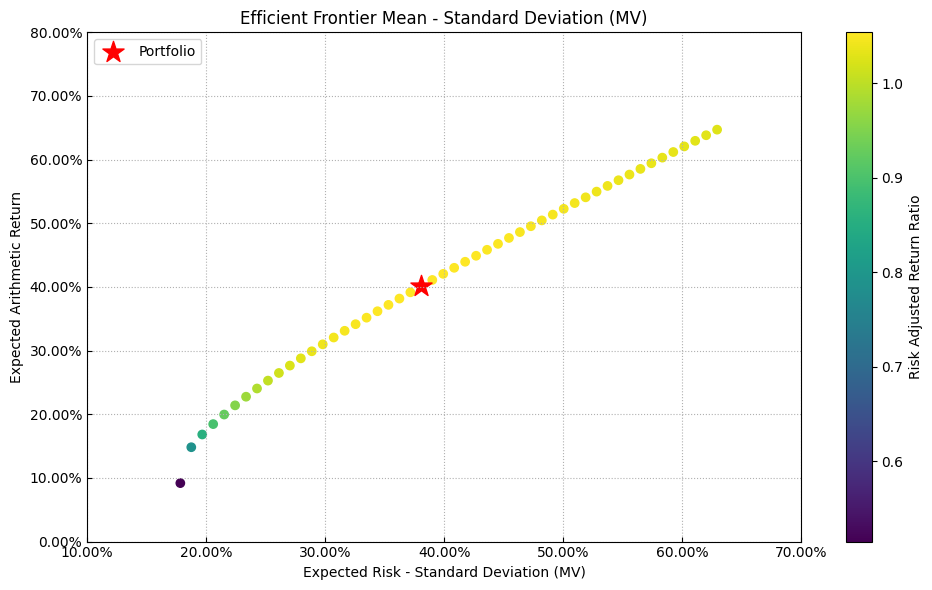

In [34]:
# Graficando la frontera eficiente
frontier=port.efficient_frontier(model=model,rm=rm,points=50,rf=rf,hist=hist)
ax=rp.plot_frontier(w_frontier=frontier,mu=port.mu,cov=port.cov,returns=Y,rm=rm,rf=rf,cmap='viridis',w=w,t_factor=12)
plt.show()

## Según nuestra Frontera Eficiente, debemos de obtener un 40% de rentabilidad y, en ese sentido, un escenario de riesgo de volatilidad de 37% aproximadamente.

In [35]:
display(frontier.T.head())

,AMD,AMZN,BABA,BRK-B,INTC,META,MSFT,NU,NVDA,PYPL,TTWO,VOO
0,1.161667e-11,2.382208e-11,0.125401,0.497797,2.712170e-11,2.534779e-11,0.042742,0.023986,7.320066e-12,2.160179e-11,1.346395e-01,1.754343e-01
1,1.139288e-08,9.540346e-09,0.080038,0.686078,1.013856e-08,8.425926e-03,0.163366,0.062092,1.881459e-08,2.785981e-09,5.115257e-08,5.131190e-08
2,4.479170e-09,3.117258e-09,0.043049,0.737007,3.556553e-09,6.109102e-02,0.095610,0.063243,7.935955e-09,8.418983e-10,9.080450e-09,1.290822e-08
3,1.767119e-09,9.700824e-10,0.014104,0.777139,1.182614e-09,1.020460e-01,0.041458,0.063860,1.392839e-03,2.350985e-10,1.945405e-09,3.065744e-09
4,1.276397e-08,8.642152e-09,0.004510,0.793739,1.068989e-08,1.118974e-01,0.007757,0.059990,2.210770e-02,2.226930e-09,1.303673e-08,2.254950e-08


In [36]:
frontier*100

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
AMD,1.161667e-09,1.139288e-06,4.479170e-07,1.767119e-07,1.276397e-06,5.408706e-07,2.941660e-07,3.326757e-07,2.340919e-07,4.119066e-07,...,2.437733e-07,3.803642e-07,3.588080e-07,3.853003e-07,3.671076e-07,1.007471e-06,1.141001e-08,7.868099e-08,1.717746e-07,2.122191e-09
AMZN,2.382208e-09,9.540346e-07,3.117258e-07,9.700824e-08,8.642152e-07,4.180362e-07,2.547473e-07,3.118637e-07,1.859644e-07,3.410833e-07,...,2.376483e-07,3.773028e-07,3.599524e-07,3.866086e-07,3.662108e-07,1.047841e-06,1.350472e-08,8.246535e-08,2.431539e-07,7.690503e-10
BABA,1.254014e+01,8.003799e+00,4.304854e+00,1.410359e+00,4.509973e-01,7.016759e-06,5.984634e-07,3.871793e-07,4.836680e-07,7.692526e-07,...,2.791112e-07,4.449072e-07,4.243513e-07,4.527784e-07,4.253928e-07,1.263742e-06,1.760308e-08,1.007762e-07,3.914458e-07,5.116998e-10
BRK-B,4.977974e+01,6.860779e+01,7.370065e+01,7.771391e+01,7.937387e+01,7.851401e+01,7.671823e+01,7.501241e+01,7.336866e+01,7.178529e+01,...,1.668861e+01,1.481745e+01,1.295105e+01,1.108916e+01,9.231536e+00,7.377929e+00,5.528198e+00,3.682069e+00,1.839385e+00,9.870402e-10
INTC,2.712170e-09,1.013856e-06,3.556553e-07,1.182614e-07,1.068989e-06,5.348298e-07,2.862545e-07,3.231727e-07,2.061442e-07,3.720051e-07,...,2.551593e-07,4.074064e-07,3.900827e-07,4.189089e-07,3.959348e-07,1.152366e-06,1.568965e-08,9.222126e-08,3.183134e-07,2.232626e-10
META,2.534779e-09,8.425926e-01,6.109102e+00,1.020460e+01,1.118974e+01,1.115787e+01,1.060096e+01,1.007178e+01,9.564430e+00,9.073839e+00,...,2.644176e-06,3.847969e-06,3.393250e-06,3.500364e-06,3.267562e-06,8.440648e-06,9.136846e-08,7.334086e-07,2.584538e-06,8.799762e-09
MSFT,4.274181e+00,1.633661e+01,9.561043e+00,4.145820e+00,7.756619e-01,6.644117e-06,1.026467e-06,8.335105e-07,1.124399e-06,1.810488e-06,...,6.426238e-07,1.006030e-06,9.523937e-07,1.021265e-06,9.685760e-07,2.811121e-06,3.947614e-08,2.485605e-07,1.189708e-06,7.192942e-10
NU,2.398559e+00,6.209197e+00,6.324342e+00,6.386027e+00,5.998956e+00,5.312083e+00,4.561771e+00,3.846531e+00,3.166910e+00,2.504194e+00,...,8.516279e-07,1.330951e-06,1.254145e-06,1.334000e-06,1.257079e-06,3.710919e-06,5.106221e-08,3.156277e-07,1.423418e-06,4.217615e-10
NVDA,7.320066e-10,1.881459e-06,7.935955e-07,1.392839e-01,2.210770e+00,5.016022e+00,8.119040e+00,1.106928e+01,1.390000e+01,1.663667e+01,...,8.331138e+01,8.518255e+01,8.704894e+01,8.891083e+01,9.076846e+01,9.262205e+01,9.447180e+01,9.631793e+01,9.816061e+01,1.000000e+02
PYPL,2.160179e-09,2.785981e-07,8.418983e-08,2.350985e-08,2.226930e-07,1.126486e-07,7.185232e-08,9.163533e-08,5.117829e-08,9.570851e-08,...,8.112351e-08,1.277576e-07,1.213433e-07,1.307014e-07,1.244989e-07,3.461583e-07,4.113494e-09,2.726122e-08,7.182451e-08,8.562104e-10


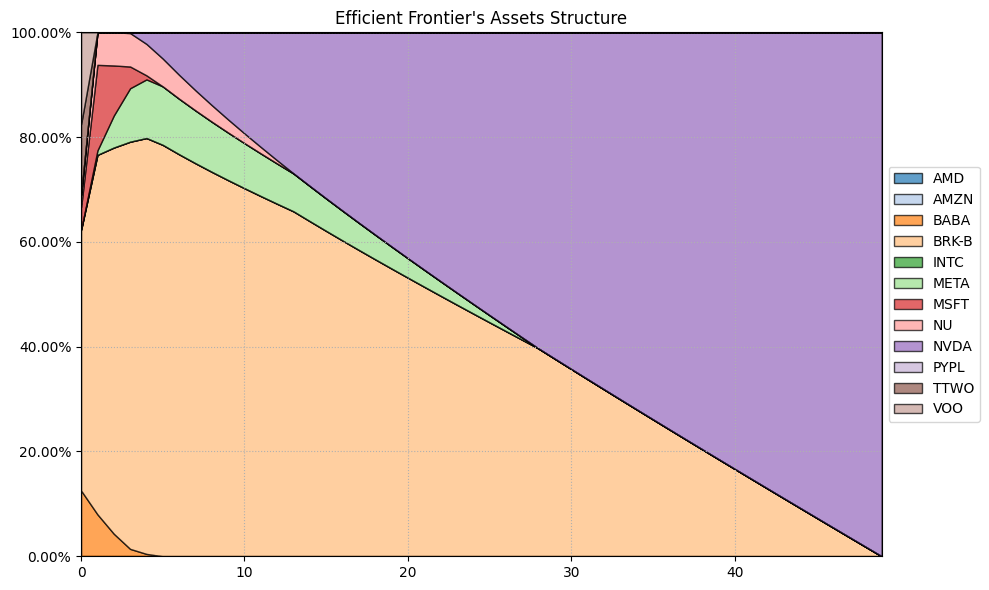

In [37]:
ax=rp.plot_frontier_area(w_frontier=frontier,cmap='tab20')
plt.show()

##Según este gráfico, mientras pasa el tiempo (desde 2018), se va a preferir a la empresa Berkshire Hathaway y NVIDIA; en comparación con otros activos de mi portafolio como Amazon, AMD, META, etc.

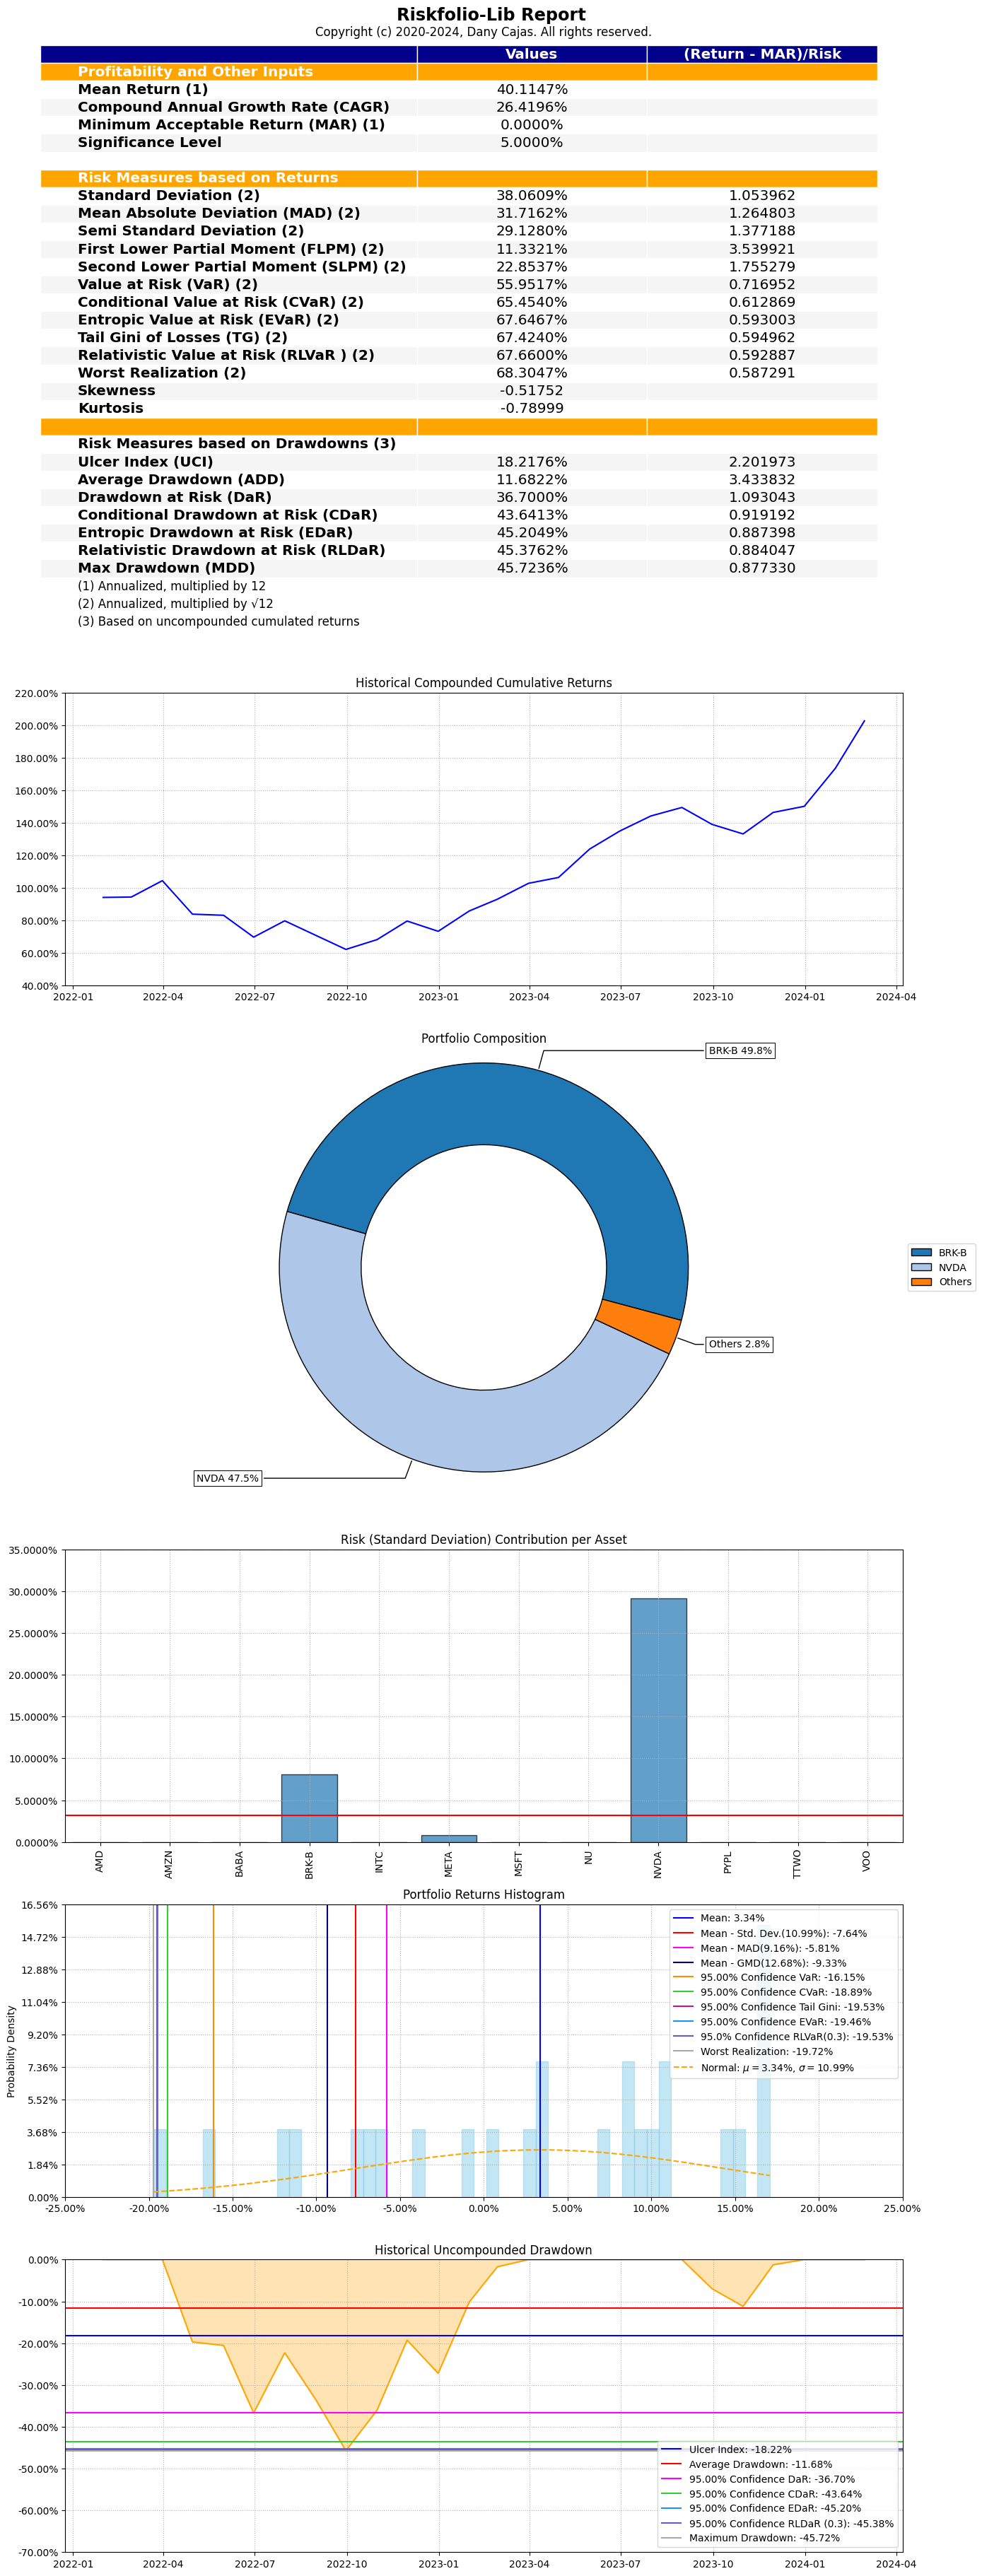

In [38]:
ax=rp.jupyter_report(Y,w,rm=rm,t_factor=12)
plt.show()